In [201]:
%config Completer.use_jedi = False

In [202]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial


In [203]:
def diverge(c, max_iter=50):
    c = complex(*c)
    z = 0

    for i in range(max_iter):
        z = np.power(z, 2) + c

        if z.real + z.imag >= 4:
            return i
    return 0

In [204]:
def make_grid(bbox, res=300):
    x_min, x_max, y_min, y_max = bbox
    x = np.linspace(x_min, x_max, res)
    y = np.linspace(y_min, y_max, res)
    xx, yy = np.meshgrid(x, y)
    coords = np.dstack([xx.flatten(), yy.flatten()])[0]

    return coords

In [205]:
bbox = (-2, 1, -1.5, 1.5)
coords = make_grid(bbox)
coords

array([[-2.        , -1.5       ],
       [-1.98996656, -1.5       ],
       [-1.97993311, -1.5       ],
       ...,
       [ 0.97993311,  1.5       ],
       [ 0.98996656,  1.5       ],
       [ 1.        ,  1.5       ]])

In [206]:
def make_mandelbrot(coords, div, plotting=True):
    mb = np.array([div(c) for c in coords])
    res = np.sqrt(coords.shape[0]).astype(int)
    mb = np.reshape(mb, (res, res))

    if plotting:
        plt.figure(figsize=(7, 7))
        plt.imshow(mb, cmap='gnuplot2')
        plt.show()

    return mb

In [207]:
def zoom(bbox, fp, factor=2):
    x, y = fp
    factor *= 2
    x_min, x_max, y_min, y_max = bbox
    width = (x_max - x_min) / factor
    height = (y_max - y_min) / factor

    return x-width, x+width, y-height, y+height


/var/folders/9k/fx177q5n7nb2j1c1h54h8j0w0000gn/T/ipykernel_12482/3511883673.py:6: RuntimeWarning: overflow encountered in power
  z = np.power(z, 2) + c
/var/folders/9k/fx177q5n7nb2j1c1h54h8j0w0000gn/T/ipykernel_12482/3511883673.py:6: RuntimeWarning: invalid value encountered in power
  z = np.power(z, 2) + c


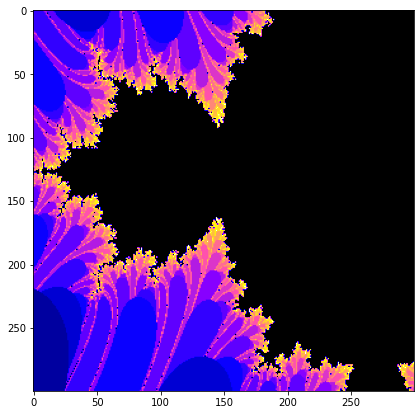

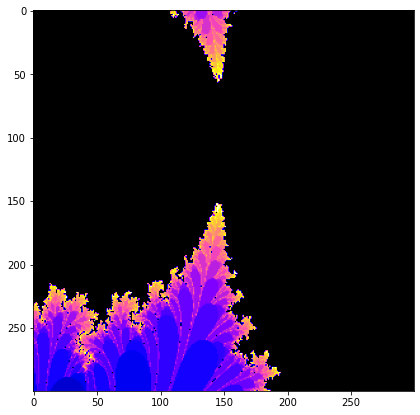

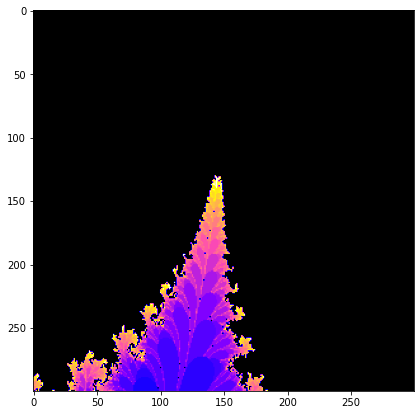

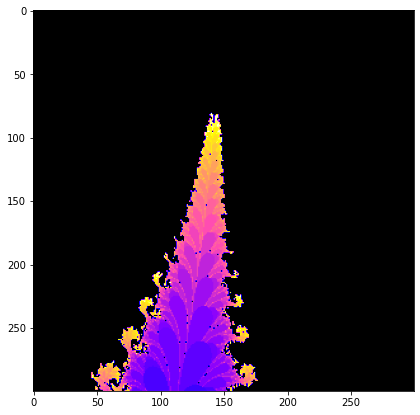

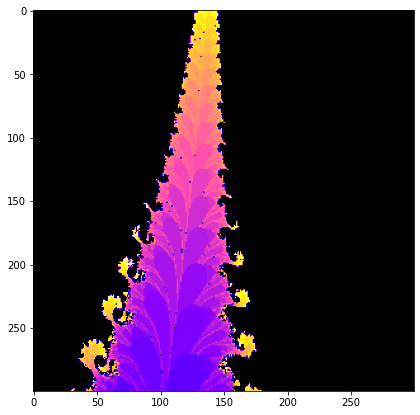

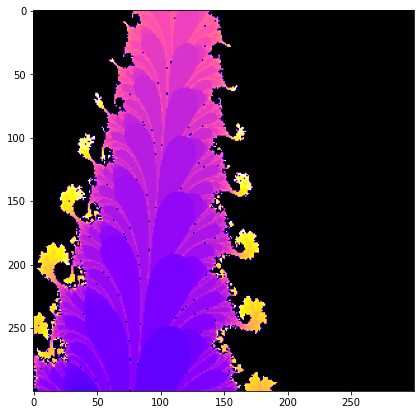

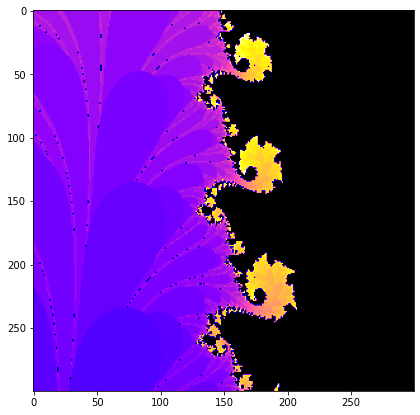

/var/folders/9k/fx177q5n7nb2j1c1h54h8j0w0000gn/T/ipykernel_12482/3511883673.py:8: RuntimeWarning: invalid value encountered in double_scalars
  if z.real + z.imag >= 4:


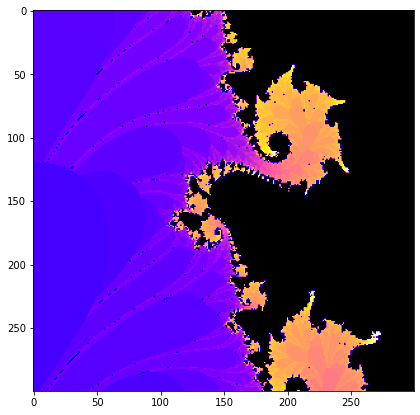

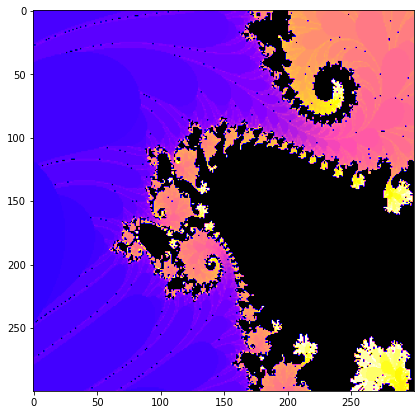

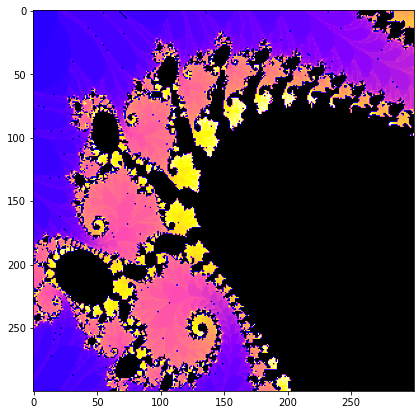

In [208]:
p = (-0.748, 0.1)
bbox = (-2.1, 1, -1.3, 1.3)

for i in range(10):
    bbox = zoom(bbox, p)
    coords = make_grid(bbox)
    div = partial(diverge, max_iter=20 + 10*i)
    make_mandelbrot(coords, div)
